## ML from 107 selected features, with nestedCV

Ref1: https://www.youtube.com/watch?v=nuIqwnsrnH0

Ref2: https://github.com/rasbt/stat451-machine-learning-fs20/blob/master/L11/code/11-eval4-algo__nested-cv_verbose1.ipynb

Ref3: https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/


In [1]:
##STEP 1.1: Import required python libraries (matplotlib, pandas, numpy).

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 1: Open file (featu107_ridge), encode class, but skip "train-test split"

### STEP 1.1: Prepare dataframe 

In [2]:
# Open file prepared for ML AFTER FeaSelect for applying X,y splitting
df11_107ridge = pd.read_csv("./output/1.1_LUAD_ML_OUT_107FeaturesRidge_318Sam_3class_16Jul22.tsv",sep='\t',header=0)

with pd.option_context('display.max_rows',2): display(df11_107ridge)

,sample_id,ACAD8,ADPGK,AFF3,APOL2,ARID1B,ARNT2,ASPSCR1,ASXL2,AZU1,...,ULK2,ULK3,USP6,VNN1,WHSC1,WHSC1L1,ZFHX3,ZMAT3,ZNF814,cluster
0,TCGA-44-6144-01,0.001767,0.001373,0.001793,0.001411,0.001799,0.001675,0.001800,0.001778,0.001799,...,0.001846,0.002002,0.001818,0.001729,0.001657,0.001370,0.001783,0.001775,0.000709,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,TCGA-78-7167-01,0.001329,0.001082,0.001330,0.001040,0.001424,0.001271,0.001534,0.001406,0.001284,...,0.001365,0.001290,0.001368,0.001330,0.001273,0.001145,0.001432,0.001263,0.000569,c3


In [3]:
# Encoding class c1,c2,c3

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df11_107ridge['cluster']) # Don't apply .fit() twice, next encoding can use .transform() directly
df11_107ridge['cluster']=encoder.transform(df11_107ridge['cluster']) 

df11_107ridge['cluster'].unique().tolist() # [0, 1, 2]

[0, 1, 2]

In [4]:
# If trying to decode back from 0,1,2 into string
inv= encoder.inverse_transform([0, 1, 2])
print(inv)

['c1' 'c2' 'c3']


In [5]:
## Define x (covariates or independent variables (features)) and y (response or dependent variables (classes)) 
x1=df11_107ridge.drop(['sample_id','cluster'],axis=1) #drop column 'sample_id' because use index no. instead
y1=df11_107ridge['cluster']

In [6]:
x1

,ACAD8,ADPGK,AFF3,APOL2,ARID1B,ARNT2,ASPSCR1,ASXL2,AZU1,CAB39L,...,UCN,ULK2,ULK3,USP6,VNN1,WHSC1,WHSC1L1,ZFHX3,ZMAT3,ZNF814
0,0.001767,0.001373,0.001793,0.001411,0.001799,0.001675,0.001800,0.001778,0.001799,0.003007,...,0.001270,0.001846,0.002002,0.001818,0.001729,0.001657,0.001370,0.001783,0.001775,0.000709
1,0.001299,0.001032,0.001335,0.001060,0.001350,0.001262,0.001342,0.001328,0.001298,0.001504,...,0.000977,0.001345,0.001275,0.001360,0.001350,0.001214,0.001018,0.001341,0.001329,0.000528
2,0.003035,0.002339,0.003089,0.002407,0.003108,0.002890,0.003213,0.003048,0.003090,0.003867,...,0.002176,0.003147,0.003205,0.003126,0.002904,0.002750,0.002290,0.003101,0.002772,0.001190
3,0.002129,0.001664,0.003457,0.001688,0.002303,0.002071,0.002151,0.002259,0.002111,0.002095,...,0.001495,0.002219,0.002091,0.002292,0.002053,0.002014,0.001705,0.002286,0.002005,0.000870
4,0.002920,0.002232,0.004315,0.002267,0.003115,0.002871,0.002985,0.018052,0.002938,0.002613,...,0.002043,0.003075,0.002845,0.003115,0.002737,0.002783,0.002276,0.003054,0.002861,0.002224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.004749,0.003675,0.006093,0.003729,0.004992,0.004568,0.005049,0.004949,0.004614,0.003291,...,0.003331,0.004930,0.004629,0.005010,0.004166,0.004528,0.003802,0.004868,0.004646,0.001948
314,0.003620,0.002743,0.003818,0.002714,0.003741,0.003445,0.003821,0.003721,0.003542,0.002367,...,0.002476,0.003746,0.003400,0.003730,0.003133,0.003315,0.002732,0.003712,0.003381,0.001400
315,0.002677,0.002169,0.002653,0.002061,0.002805,0.002533,0.002877,0.002922,0.002628,0.003029,...,0.001897,0.002755,0.002825,0.002731,0.002339,0.002594,0.002319,0.002804,0.002504,0.001170
316,0.002769,0.002109,0.002951,0.002087,0.002832,0.002602,0.002944,0.002796,0.002718,0.001833,...,0.001905,0.002851,0.002598,0.002819,0.002395,0.002684,0.002087,0.002805,0.002512,0.001065


In [ ]:
##-------------Skip Normalization for this dataset bc Heat Diff in range [0,1]-----
## Data normalization
## https://scikit-learn.org/stable/modules/preprocessing.html
## Standardization of datasets is a common requirement for many machine learning estimators 
##implemented in scikit-learn; they might behave badly if the individual features do not 
## more or less look like standard normally distributed data: Gaussian with zero mean and 
## unit variance.

## The preprocessing module provides the StandardScaler utility class, which 
## is a quick and easy way to perform the following operation on an array-like dataset:
## >>> scaler = preprocessing.StandardScaler().fit(X_train)

from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

# norm_x=scaler.fit_transform(x_drop_nan) ## = preprocessing.StandardScaler().fit_transform(X_train)
# names=x_drop_nan.columns
# norm_x_df=pd.DataFrame(norm_x,columns=names)
# norm_x_df.head(3)

In [ ]:
##-------------Skip Train-Test Split (75:25)-----
# Split the data into 75 to 25 with stratified between y class labels (get approx equal proportion per class)
from sklearn.model_selection import train_test_split
#X1_train,X1_test,y1_train,y1_test=train_test_split(x1,y1,stratify=y1,test_size=0.25,random_state=42)

### STEP 1.2: Start Training

Ref: https://github.com/rasbt/stat451-machine-learning-fs20/blob/master/L11/code/11-eval4-algo__nested-cv_verbose1.ipynb

- Setting up classifiers (or pipelines) and the parameter grids for model tuning
- Remember, the hyperparameter tuning takes place in the inner loop

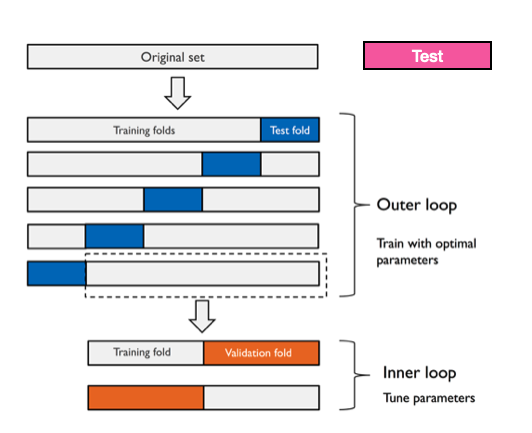

In [8]:
import numpy as np

#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import time

Note: 
- Outeer loop: purpose related to train-test split (=evaluating model with final test set(holdout))
- Inner loop: like K-fold cross-validation for finding hyperparameter tuning

Here:
- Split outter loop = 4 (to mimic previous train-test split= 75:25)  
- Split inner loop = 5 (to mimic previous cv=5 before discovering nestedCV)

### Round1: collect score in dataframe, change outer split to 5, inner split to 3 (random_state=42)

In [152]:
# Initializing Classifiers
clf1 = LogisticRegression(multi_class='multinomial',
                          solver='newton-cg',
                          random_state=42)
clf2 = KNeighborsClassifier(algorithm='ball_tree',
                            leaf_size=50)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = RandomForestClassifier(random_state=42)
clf5 = SVC(random_state=42)
clf6 = MLPClassifier(activation='relu',
                   solver='lbfgs', #change from lbfgs (default=adam, which is suitable for big data (>1000 samples)
                   max_iter=10000,   #increase interations from 10000
                   random_state=42)

# Setting up the parameter grids
param_grid1 = [{'penalty': ['l2'],
                'C': np.power(10., np.arange(-4, 4))}]

param_grid2 = [{'n_neighbors': list(range(1, 10)),
                'p': [1, 2]}]

param_grid3 = [{'max_depth': list(range(1, 10)) + [None],
                'criterion': ['gini', 'entropy']}]

param_grid4 = [{'n_estimators': range(10, 100, 5), #[10, 100, 500, 1000, 10000]
               'criterion': ['gini', 'entropy']}] #'max_depth': range(1, 80)

param_grid5 = [{'kernel': ['linear'], 'C': [0.1, 1, 5, 10, 50,100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 5, 10, 50,100], 'gamma': [0.0001,0.001,0.01,0.1,1,2,4,6,8,10]},
    {'kernel': ['poly'], 'C': [0.1, 1, 5, 10, 50,100], 'degree': [0.0001,0.001,0.01,0.1,1,2,4,6,8,10]}]


param_grid6 = [{'hidden_layer_sizes': range(3, 10)}]   #ทดสอบ 3 - 10 นิวรอน

In [153]:
# Setting up multiple GridSearchCV objects, 1 for each algorithm
## Split outter loop = 5 
## Split inner loop = 3

gridcvs = {}
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) #original: n_splits=2

for est, pgrid, name in zip((clf1, clf2, clf3, clf4, clf5, clf6),
                            (param_grid1, param_grid2, param_grid3, param_grid4, param_grid5, param_grid6),
                            ('Softmax', 'KNN', 'DTree', 'RForest','SVM', 'MLP')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='accuracy',
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True) #finally, use best parameter to fit the total training set again
    gridcvs[name] = gcv

In [157]:
## Test to see results
sorted(gridcvs.items()) # sort by name

[('DTree',
  GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
               estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
               param_grid=[{'criterion': ['gini', 'entropy'],
                            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]}],
               scoring='accuracy')),
 ('KNN',
  GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
               estimator=KNeighborsClassifier(algorithm='ball_tree',
                                              leaf_size=50),
               n_jobs=-1,
               param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                            'p': [1, 2]}],
               scoring='accuracy')),
 ('MLP',
  GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
               estimator=MLPClassifier(max_iter=10000, random_state=42,
                                       solver='lbfgs'),
               n_jobs=-1, param_grid=[{'hidden_

In [158]:
## Test to see results
outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42) 
for train_idx, test_idx in outer_cv.split(x1, y1):
    print(x1.loc[train_idx]) # or (x1.iloc[train_idx]) is also work

# train_idx is a consecutive index numbers

        ACAD8     ADPGK      AFF3     APOL2    ARID1B     ARNT2   ASPSCR1  \
0    0.001767  0.001373  0.001793  0.001411  0.001799  0.001675  0.001800   
2    0.003035  0.002339  0.003089  0.002407  0.003108  0.002890  0.003213   
3    0.002129  0.001664  0.003457  0.001688  0.002303  0.002071  0.002151   
5    0.001713  0.001340  0.001806  0.001382  0.001784  0.003193  0.001716   
6    0.002610  0.001945  0.002632  0.002022  0.002658  0.002404  0.002577   
..        ...       ...       ...       ...       ...       ...       ...   
308  0.002827  0.002166  0.003074  0.002275  0.002942  0.002698  0.003072   
309  0.001756  0.001381  0.001788  0.001383  0.001829  0.001695  0.001962   
310  0.001348  0.001055  0.001330  0.001062  0.001357  0.001272  0.001541   
313  0.004749  0.003675  0.006093  0.003729  0.004992  0.004568  0.005049   
316  0.002769  0.002109  0.002951  0.002087  0.002832  0.002602  0.002944   

        ASXL2      AZU1    CAB39L  ...       UCN      ULK2      ULK3  \
0  

In [59]:
d = {'col1': [1, 2,3,4,5]} # depends on no. of outer fold (here, k=5)
df11=pd.DataFrame(data=d)
df11 

,col1
0,1
1,2
2,3
3,4
4,5


In [67]:
import time

time_start = time.time()

df12=df11.iloc[:,0:0]
df15=df11.iloc[:,0:0]

for name, gs_est in sorted(gridcvs.items()):

    print(50 * '-', '\n')
    print('Algorithm:', name)
    print('    Inner loop:')
    
    outer_scores = []
    inner_scores = []
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) ## Split outter loop = 5 to mimic 80:20
    
    
    for train_idx, test_idx in outer_cv.split(x1, y1): #outer loop divided into train-test fold
        
        gridcvs[name].fit(x1.loc[train_idx], y1.loc[train_idx]) # edited from: fit(x1[train_idx], y1[train_idx])
                                                        # run inner loop hyperparam tuning, 
                                                        # where GridSearchCV for each model
        print('\n        Best ACC (avg. of inner test folds) %.2f%%' % (gridcvs[name].best_score_ * 100))
        print('        Best parameters:', gridcvs[name].best_params_)
        
        inner_scores.append(gridcvs[name].best_score_ * 100) # keep inner scores
        
        # Performance on test fold (test_idx)
        outer_scores.append(gridcvs[name].best_estimator_.score(x1.loc[test_idx], y1.loc[test_idx]))
                                                        # edited from: .score(x1[test_idx], y1[test_idx])
        print('        ACC (on outer test fold) %.2f%%' % (outer_scores[-1]*100))
    
    print('\n    Outer Loop:')
    print('        ACC %.2f%% +/- %.2f' % 
              (np.mean(outer_scores) * 100, np.std(outer_scores) * 100))
    
    # To make dataframe of outer_scores
    outer_scores2 = []
    for i in outer_scores:
        outer_scores2.append(i*100) # convert outer_scores to percentage
    df13 = pd.DataFrame(outer_scores2)
    df13.rename(columns={0: name},inplace=True)
    for i in df13.columns:
        df12[i]=df13[i]
    # To make dataframe of inner_scores
    df14 = pd.DataFrame(inner_scores)
    df14.rename(columns={0: name},inplace=True)
    for i in df14.columns:
        df15[i]=df14[i]
    
time_end = time.time()
print(f'Total Time: {(time_end - time_start)/60} - Minute')

-------------------------------------------------- 

Algorithm: DTree
    Inner loop:

        Best ACC (avg. of inner test folds) 77.15%
        Best parameters: {'criterion': 'entropy', 'max_depth': 4}
        ACC (on outer test fold) 81.25%

        Best ACC (avg. of inner test folds) 80.33%
        Best parameters: {'criterion': 'entropy', 'max_depth': 6}
        ACC (on outer test fold) 81.25%

        Best ACC (avg. of inner test folds) 78.75%
        Best parameters: {'criterion': 'entropy', 'max_depth': 3}
        ACC (on outer test fold) 82.81%

        Best ACC (avg. of inner test folds) 83.53%
        Best parameters: {'criterion': 'entropy', 'max_depth': 4}
        ACC (on outer test fold) 69.84%

        Best ACC (avg. of inner test folds) 76.47%
        Best parameters: {'criterion': 'entropy', 'max_depth': 3}
        ACC (on outer test fold) 79.37%

    Outer Loop:
        ACC 78.90% +/- 4.66
-------------------------------------------------- 

Algorithm: KNN
    Inner l

#### Result

In [88]:
print('inner_scores: \n') 
df15  # validation_score

inner_scores: 



,DTree,KNN,MLP,RForest,SVM,Softmax
0,77.147526,62.983193,86.227824,80.303455,87.002801,49.607843
1,80.331466,61.036415,86.984127,77.969188,87.796452,50.000000
2,78.748833,64.187675,86.209150,83.067227,88.183940,49.607843
3,83.529412,65.490196,89.411765,81.176471,88.627451,49.803922
4,76.470588,63.921569,87.058824,82.352941,87.843137,49.803922


In [73]:
print('outer_scores: \n') 
df12  # test_scores

outer_scores: 



,DTree,KNN,MLP,RForest,SVM,Softmax
0,81.250000,64.062500,89.062500,84.375000,93.750000,50.000000
1,81.250000,68.750000,71.875000,85.937500,87.500000,50.000000
2,82.812500,62.500000,87.500000,82.812500,87.500000,50.000000
3,69.841270,60.317460,74.603175,80.952381,82.539683,49.206349
4,79.365079,58.730159,95.238095,84.126984,88.888889,49.206349


In [97]:
# Reformat inner_scores (validation set) dataframe

df16=df15.transpose().reset_index(drop=False)
df16.rename(columns={'index': 'model'},inplace=True)
df16

,model,0,1,2,3,4
0,DTree,77.147526,80.331466,78.748833,83.529412,76.470588
1,KNN,62.983193,61.036415,64.187675,65.490196,63.921569
2,MLP,86.227824,86.984127,86.209150,89.411765,87.058824
3,RForest,80.303455,77.969188,83.067227,81.176471,82.352941
4,SVM,87.002801,87.796452,88.183940,88.627451,87.843137
5,Softmax,49.607843,50.000000,49.607843,49.803922,49.803922


In [98]:
# Reformat inner_scores (validation set) dataframe

df17a=df16.iloc[:,[0,1]]
df17a.rename(columns={0: 'rep'},inplace=True)

df17b=df16.iloc[:,[0,2]]
df17b.rename(columns={1: 'rep'},inplace=True)

df17c=df16.iloc[:,[0,3]]
df17c.rename(columns={2: 'rep'},inplace=True)

df17d=df16.iloc[:,[0,4]]
df17d.rename(columns={3: 'rep'},inplace=True)

df17e=df16.iloc[:,[0,5]]
df17e.rename(columns={4: 'rep'},inplace=True)

df17 = pd.concat([df17a, df17b, df17c, df17d, df17e], ignore_index=True)

# insert column (validation or test sets)
df17.insert(0, "set", "Validation", True)
df17

/opt/anaconda3/envs/sklearnenv/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,set,model,rep
0,Validation,DTree,77.147526
1,Validation,KNN,62.983193
2,Validation,MLP,86.227824
3,Validation,RForest,80.303455
4,Validation,SVM,87.002801
5,Validation,Softmax,49.607843
6,Validation,DTree,80.331466
7,Validation,KNN,61.036415
8,Validation,MLP,86.984127
9,Validation,RForest,77.969188


In [101]:
# Reformat outer_scores (test set) dataframe

df18=df12.transpose().reset_index(drop=False)
df18.rename(columns={'index': 'model'},inplace=True)
df18

,model,0,1,2,3,4
0,DTree,81.2500,81.2500,82.8125,69.841270,79.365079
1,KNN,64.0625,68.7500,62.5000,60.317460,58.730159
2,MLP,89.0625,71.8750,87.5000,74.603175,95.238095
3,RForest,84.3750,85.9375,82.8125,80.952381,84.126984
4,SVM,93.7500,87.5000,87.5000,82.539683,88.888889
5,Softmax,50.0000,50.0000,50.0000,49.206349,49.206349


In [102]:
# Reformat outer_scores (test set) dataframe

df19a=df18.iloc[:,[0,1]]
df19a.rename(columns={0: 'rep'},inplace=True)

df19b=df18.iloc[:,[0,2]]
df19b.rename(columns={1: 'rep'},inplace=True)

df19c=df18.iloc[:,[0,3]]
df19c.rename(columns={2: 'rep'},inplace=True)

df19d=df18.iloc[:,[0,4]]
df19d.rename(columns={3: 'rep'},inplace=True)

df19e=df18.iloc[:,[0,5]]
df19e.rename(columns={4: 'rep'},inplace=True)

df19 = pd.concat([df19a, df19b, df19c, df19d, df19e], ignore_index=True)

# insert column (validation or test sets)
df19.insert(0, "set", "Test", True)
df19

/opt/anaconda3/envs/sklearnenv/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,set,model,rep
0,Test,DTree,81.250000
1,Test,KNN,64.062500
2,Test,MLP,89.062500
3,Test,RForest,84.375000
4,Test,SVM,93.750000
5,Test,Softmax,50.000000
6,Test,DTree,81.250000
7,Test,KNN,68.750000
8,Test,MLP,71.875000
9,Test,RForest,85.937500


In [103]:
# Finally, concat both 'Validation' and 'Test' dataframes
df20 = pd.concat([df17,df19], ignore_index=True)
with pd.option_context('display.max_rows',6): display(df20)

,set,model,rep
0,Validation,DTree,77.147526
1,Validation,KNN,62.983193
2,Validation,MLP,86.227824
...,...,...,...
57,Test,RForest,84.126984
58,Test,SVM,88.888889
59,Test,Softmax,49.206349


#### Plot graph

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'DTree'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'MLP'),
  Text(3, 0, 'RForest'),
  Text(4, 0, 'SVM'),
  Text(5, 0, 'Softmax')])

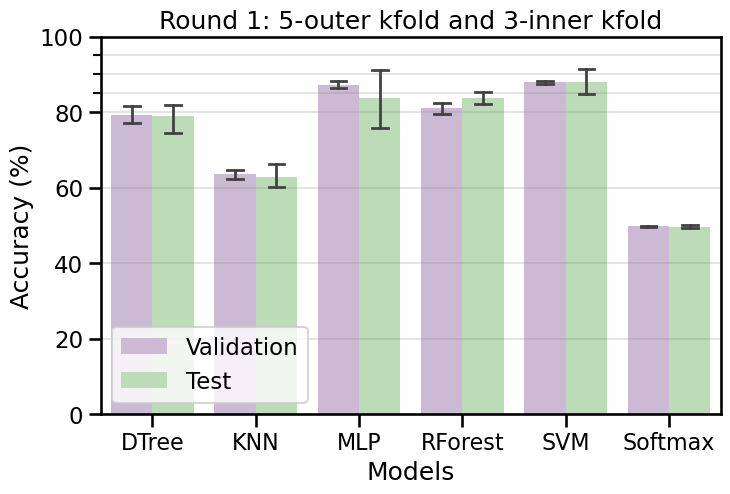

In [151]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
p = sns.barplot(x="model", y="rep", hue="set", data=df20,capsize=.15,palette="PRGn",errwidth=2, ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_yticks(np.arange(80, 100, 5),minor=True) # minor tick
ax.set(ylim=(0, 100)) # set y-axis scale
ax.set_title('Round 1: 5-outer kfold and 3-inner kfold')
ax.grid(which='both', axis='y',color='grey', linestyle='-', linewidth=.3) # major grid line
#ax.grid(which='major', axis='y',color='grey', linestyle='-', linewidth=.3) 
p.legend_.set_title(None)
plt.xticks(rotation =0,fontsize=16)

### Round2: Change outer split to 4, inner split to 5 (random_state=42)

In [156]:
# Setting up multiple GridSearchCV objects, 1 for each algorithm
## Split outter loop = 4 (to mimic train-test spliting = 75:25
## Split inner loop = 5 (to mimic cv=5 before discovering nestedCV) 

gridcvs = {}
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #original: n_splits=2

for est, pgrid, name in zip((clf1, clf2, clf3, clf4, clf5, clf6),
                            (param_grid1, param_grid2, param_grid3, param_grid4, param_grid5, param_grid6),
                            ('Softmax', 'KNN', 'DTree', 'RForest','SVM', 'MLP')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='accuracy',
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True) #finally, use best parameter to fit the total training set again
    gridcvs[name] = gcv

In [160]:
d = {'col1': [1, 2,3,4]} # depends on no. of outer fold (here, k=4)
df11=pd.DataFrame(data=d)
df11 

,col1
0,1
1,2
2,3
3,4


In [161]:
import time

time_start = time.time()

df12=df11.iloc[:,0:0]
df15=df11.iloc[:,0:0]

for name, gs_est in sorted(gridcvs.items()):

    print(50 * '-', '\n')
    print('Algorithm:', name)
    print('    Inner loop:')
    
    outer_scores = []
    inner_scores = []
    outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42) ## Split outter loop = 4 to mimic 75:25
    
    
    for train_idx, test_idx in outer_cv.split(x1, y1): #outer loop divided into train-test fold
        
        gridcvs[name].fit(x1.loc[train_idx], y1.loc[train_idx]) # edited from: fit(x1[train_idx], y1[train_idx])
                                                        # run inner loop hyperparam tuning, 
                                                        # where GridSearchCV for each model
        print('\n        Best ACC (avg. of inner test folds) %.2f%%' % (gridcvs[name].best_score_ * 100))
        print('        Best parameters:', gridcvs[name].best_params_)
        
        inner_scores.append(gridcvs[name].best_score_ * 100) # keep inner scores
        
        # Performance on test fold (test_idx)
        outer_scores.append(gridcvs[name].best_estimator_.score(x1.loc[test_idx], y1.loc[test_idx]))
                                                        # edited from: .score(x1[test_idx], y1[test_idx])
        print('        ACC (on outer test fold) %.2f%%' % (outer_scores[-1]*100))
    
    print('\n    Outer Loop:')
    print('        ACC %.2f%% +/- %.2f' % 
              (np.mean(outer_scores) * 100, np.std(outer_scores) * 100))
    
    # To make dataframe of outer_scores
    outer_scores2 = []
    for i in outer_scores:
        outer_scores2.append(i*100) # convert outer_scores to percentage
    df13 = pd.DataFrame(outer_scores2)
    df13.rename(columns={0: name},inplace=True)
    for i in df13.columns:
        df12[i]=df13[i]
    # To make dataframe of inner_scores
    df14 = pd.DataFrame(inner_scores)
    df14.rename(columns={0: name},inplace=True)
    for i in df14.columns:
        df15[i]=df14[i]
    
time_end = time.time()
print(f'Total Time: {(time_end - time_start)/60} - Minute')

-------------------------------------------------- 

Algorithm: DTree
    Inner loop:

        Best ACC (avg. of inner test folds) 80.28%
        Best parameters: {'criterion': 'gini', 'max_depth': 3}
        ACC (on outer test fold) 80.00%

        Best ACC (avg. of inner test folds) 80.24%
        Best parameters: {'criterion': 'gini', 'max_depth': 6}
        ACC (on outer test fold) 83.75%

        Best ACC (avg. of inner test folds) 81.61%
        Best parameters: {'criterion': 'entropy', 'max_depth': 6}
        ACC (on outer test fold) 74.68%

        Best ACC (avg. of inner test folds) 78.25%
        Best parameters: {'criterion': 'gini', 'max_depth': 5}
        ACC (on outer test fold) 74.68%

    Outer Loop:
        ACC 78.28% +/- 3.83
-------------------------------------------------- 

Algorithm: KNN
    Inner loop:

        Best ACC (avg. of inner test folds) 63.83%
        Best parameters: {'n_neighbors': 1, 'p': 1}
        ACC (on outer test fold) 66.25%

        Best ACC 

#### Result

In [164]:
display(df15, df12)
# df15=inner_scores (validation_score)
# df12=outer_scores (test_scores)

,DTree,KNN,MLP,RForest,SVM,Softmax
0,80.283688,63.829787,85.709220,81.932624,87.411348,50.008865
1,80.239362,57.960993,86.533688,80.248227,88.634752,50.008865
2,81.613475,66.569149,89.140071,83.289007,89.946809,49.379433
3,78.253546,67.757092,90.363475,82.863475,89.131206,49.796099


,DTree,KNN,MLP,RForest,SVM,Softmax
0,80.000000,66.250000,73.750000,83.750000,87.500000,48.750000
1,83.750000,62.500000,83.750000,88.750000,91.250000,48.750000
2,74.683544,64.556962,78.481013,78.481013,86.075949,50.632911
3,74.683544,56.962025,86.075949,75.949367,86.075949,50.632911


In [167]:
#-----------Reformat inner_scores (validation set) dataframe-----------

df16=df15.transpose().reset_index(drop=False)
df16.rename(columns={'index': 'model'},inplace=True)

# df17 (a,b,c,d) equals to outer_cv (here=4)

df17a=df16.iloc[:,[0,1]]
df17a.rename(columns={0: 'rep'},inplace=True)

df17b=df16.iloc[:,[0,2]]
df17b.rename(columns={1: 'rep'},inplace=True)

df17c=df16.iloc[:,[0,3]]
df17c.rename(columns={2: 'rep'},inplace=True)

df17d=df16.iloc[:,[0,4]]
df17d.rename(columns={3: 'rep'},inplace=True)

df17 = pd.concat([df17a, df17b, df17c, df17d], ignore_index=True)

# insert column (validation or test sets)
df17.insert(0, "set", "Validation", True)


#-----------Reformat outer_scores (test set) dataframe-----------

df18=df12.transpose().reset_index(drop=False)
df18.rename(columns={'index': 'model'},inplace=True)

# df19 (a,b,c,d,...) equals to outer_cv (here=4)

df19a=df18.iloc[:,[0,1]]
df19a.rename(columns={0: 'rep'},inplace=True)

df19b=df18.iloc[:,[0,2]]
df19b.rename(columns={1: 'rep'},inplace=True)

df19c=df18.iloc[:,[0,3]]
df19c.rename(columns={2: 'rep'},inplace=True)

df19d=df18.iloc[:,[0,4]]
df19d.rename(columns={3: 'rep'},inplace=True)

df19 = pd.concat([df19a, df19b, df19c, df19d], ignore_index=True)

# insert column (validation or test sets)
df19.insert(0, "set", "Test", True)

# Finally, concat both 'Validation' and 'Test' dataframes
df20 = pd.concat([df17,df19], ignore_index=True)
with pd.option_context('display.max_rows',10): display(df20)

# 4 fold x 6 models = 24 x 2 (valid,test) = 48

/opt/anaconda3/envs/sklearnenv/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,set,model,rep
0,Validation,DTree,80.283688
1,Validation,KNN,63.829787
2,Validation,MLP,85.709220
3,Validation,RForest,81.932624
4,Validation,SVM,87.411348
...,...,...,...
43,Test,KNN,56.962025
44,Test,MLP,86.075949
45,Test,RForest,75.949367
46,Test,SVM,86.075949


#### Plot graph

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'DTree'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'MLP'),
  Text(3, 0, 'RForest'),
  Text(4, 0, 'SVM'),
  Text(5, 0, 'Softmax')])

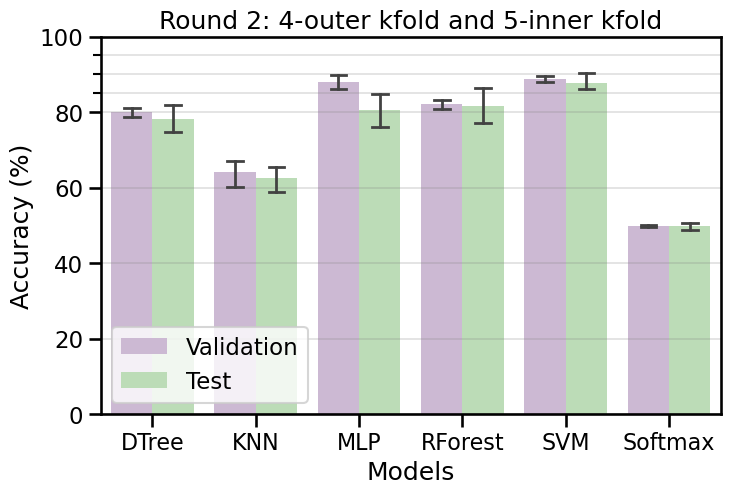

In [168]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
p = sns.barplot(x="model", y="rep", hue="set", data=df20,capsize=.15,palette="PRGn",errwidth=2, ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_yticks(np.arange(80, 100, 5),minor=True) # minor tick
ax.set(ylim=(0, 100)) # set y-axis scale
ax.set_title('Round 2: 4-outer kfold and 5-inner kfold')
ax.grid(which='both', axis='y',color='grey', linestyle='-', linewidth=.3) # major grid line
#ax.grid(which='major', axis='y',color='grey', linestyle='-', linewidth=.3) 
p.legend_.set_title(None)
plt.xticks(rotation =0,fontsize=16)

### ***Round3: change outer split to 5, inner split to 3 (random_state=1)

In [169]:
# Initializing Classifiers
clf1 = LogisticRegression(multi_class='multinomial',
                          solver='newton-cg',
                          random_state=1)
clf2 = KNeighborsClassifier(algorithm='ball_tree',
                            leaf_size=50)
clf3 = DecisionTreeClassifier(random_state=1)
clf4 = RandomForestClassifier(random_state=1)
clf5 = SVC(random_state=1)
clf6 = MLPClassifier(activation='relu',
                   solver='lbfgs', #change from lbfgs (default=adam, which is suitable for big data (>1000 samples)
                   max_iter=10000,   #increase interations from 10000
                   random_state=1)

# Setting up the parameter grids
param_grid1 = [{'penalty': ['l2'],
                'C': np.power(10., np.arange(-4, 4))}]

param_grid2 = [{'n_neighbors': list(range(1, 10)),
                'p': [1, 2]}]

param_grid3 = [{'max_depth': list(range(1, 10)) + [None],
                'criterion': ['gini', 'entropy']}]

param_grid4 = [{'n_estimators': range(10, 100, 5), #[10, 100, 500, 1000, 10000]
               'criterion': ['gini', 'entropy']}] #'max_depth': range(1, 80)

param_grid5 = [{'kernel': ['linear'], 'C': [0.1, 1, 5, 10, 50,100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 5, 10, 50,100], 'gamma': [0.0001,0.001,0.01,0.1,1,2,4,6,8,10]},
    {'kernel': ['poly'], 'C': [0.1, 1, 5, 10, 50,100], 'degree': [0.0001,0.001,0.01,0.1,1,2,4,6,8,10]}]


param_grid6 = [{'hidden_layer_sizes': range(3, 10)}]   #ทดสอบ 3 - 10 นิวรอน

In [170]:
# Setting up multiple GridSearchCV objects, 1 for each algorithm
## Split outter loop = 5 (to mimic train-test spliting = 75:25
## Split inner loop = 3 (to mimic cv=5 before discovering nestedCV) 

gridcvs = {}
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1) #original: n_splits=2

for est, pgrid, name in zip((clf1, clf2, clf3, clf4, clf5, clf6),
                            (param_grid1, param_grid2, param_grid3, param_grid4, param_grid5, param_grid6),
                            ('Softmax', 'KNN', 'DTree', 'RForest','SVM', 'MLP')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='accuracy',
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True) #finally, use best parameter to fit the total training set again
    gridcvs[name] = gcv

# Create dataframe to keep scores for ploting (by slicing index)
d = {'col1': [1, 2,3,4,5]} # depends on no. of outer fold (here, k=5)
df11=pd.DataFrame(data=d)
df11 

,col1
0,1
1,2
2,3
3,4
4,5


In [171]:
import time

time_start = time.time()

df12=df11.iloc[:,0:0]
df15=df11.iloc[:,0:0]

for name, gs_est in sorted(gridcvs.items()):

    print(50 * '-', '\n')
    print('Algorithm:', name)
    print('    Inner loop:')
    
    outer_scores = []
    inner_scores = []
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) ## Split outter loop = 5 to mimic 80:20
    
    
    for train_idx, test_idx in outer_cv.split(x1, y1): #outer loop divided into train-test fold
        
        gridcvs[name].fit(x1.loc[train_idx], y1.loc[train_idx]) # edited from: fit(x1[train_idx], y1[train_idx])
                                                        # run inner loop hyperparam tuning, 
                                                        # where GridSearchCV for each model
        print('\n        Best ACC (avg. of inner test folds) %.2f%%' % (gridcvs[name].best_score_ * 100))
        print('        Best parameters:', gridcvs[name].best_params_)
        
        inner_scores.append(gridcvs[name].best_score_ * 100) # keep inner scores
        
        # Performance on test fold (test_idx)
        outer_scores.append(gridcvs[name].best_estimator_.score(x1.loc[test_idx], y1.loc[test_idx]))
                                                        # edited from: .score(x1[test_idx], y1[test_idx])
        print('        ACC (on outer test fold) %.2f%%' % (outer_scores[-1]*100))
    
    print('\n    Outer Loop:')
    print('        ACC %.2f%% +/- %.2f' % 
              (np.mean(outer_scores) * 100, np.std(outer_scores) * 100))
    
    # To make dataframe of outer_scores
    outer_scores2 = []
    for i in outer_scores:
        outer_scores2.append(i*100) # convert outer_scores to percentage
    df13 = pd.DataFrame(outer_scores2)
    df13.rename(columns={0: name},inplace=True)
    for i in df13.columns:
        df12[i]=df13[i]
    # To make dataframe of inner_scores
    df14 = pd.DataFrame(inner_scores)
    df14.rename(columns={0: name},inplace=True)
    for i in df14.columns:
        df15[i]=df14[i]
    
time_end = time.time()
print(f'Total Time: {(time_end - time_start)/60} - Minute')

-------------------------------------------------- 

Algorithm: DTree
    Inner loop:

        Best ACC (avg. of inner test folds) 77.96%
        Best parameters: {'criterion': 'gini', 'max_depth': 3}
        ACC (on outer test fold) 84.38%

        Best ACC (avg. of inner test folds) 74.39%
        Best parameters: {'criterion': 'gini', 'max_depth': 3}
        ACC (on outer test fold) 76.56%

        Best ACC (avg. of inner test folds) 77.15%
        Best parameters: {'criterion': 'gini', 'max_depth': 3}
        ACC (on outer test fold) 82.81%

        Best ACC (avg. of inner test folds) 75.69%
        Best parameters: {'criterion': 'gini', 'max_depth': 3}
        ACC (on outer test fold) 77.78%

        Best ACC (avg. of inner test folds) 81.57%
        Best parameters: {'criterion': 'entropy', 'max_depth': 5}
        ACC (on outer test fold) 69.84%

    Outer Loop:
        ACC 78.27% +/- 5.14
-------------------------------------------------- 

Algorithm: KNN
    Inner loop:

      

/opt/anaconda3/envs/sklearnenv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



        Best ACC (avg. of inner test folds) 89.41%
        Best parameters: {'hidden_layer_sizes': 9}
        ACC (on outer test fold) 88.89%

        Best ACC (avg. of inner test folds) 88.24%
        Best parameters: {'hidden_layer_sizes': 9}
        ACC (on outer test fold) 85.71%

    Outer Loop:
        ACC 90.55% +/- 3.21
-------------------------------------------------- 

Algorithm: RForest
    Inner loop:

        Best ACC (avg. of inner test folds) 82.68%
        Best parameters: {'criterion': 'entropy', 'n_estimators': 85}
        ACC (on outer test fold) 79.69%

        Best ACC (avg. of inner test folds) 80.32%
        Best parameters: {'criterion': 'entropy', 'n_estimators': 55}
        ACC (on outer test fold) 78.12%

        Best ACC (avg. of inner test folds) 80.30%
        Best parameters: {'criterion': 'gini', 'n_estimators': 60}
        ACC (on outer test fold) 90.62%

        Best ACC (avg. of inner test folds) 80.78%
        Best parameters: {'criterion': 'gini',

#### Result

In [172]:
display(df15, df12)
# df15=inner_scores (validation_score)
# df12=outer_scores (test_scores)

,DTree,KNN,MLP,RForest,SVM,Softmax
0,77.959851,63.772176,89.388422,82.675070,86.232493,49.607843
1,74.393091,64.547152,84.649860,80.317460,86.237162,49.607843
2,77.147526,62.567694,87.030812,80.298786,88.576097,49.607843
3,75.686275,66.666667,89.411765,80.784314,88.235294,49.803922
4,81.568627,67.058824,88.235294,82.745098,89.803922,49.803922


,DTree,KNN,MLP,RForest,SVM,Softmax
0,84.375000,65.625000,92.187500,79.687500,89.062500,50.000000
1,76.562500,60.937500,90.625000,78.125000,93.750000,50.000000
2,82.812500,65.625000,95.312500,90.625000,85.937500,50.000000
3,77.777778,65.079365,88.888889,76.190476,84.126984,49.206349
4,69.841270,61.904762,85.714286,74.603175,80.952381,49.206349


In [173]:
#-----------Reformat inner_scores (validation set) dataframe-----------

df16=df15.transpose().reset_index(drop=False)
df16.rename(columns={'index': 'model'},inplace=True)

# df17 (a,b,c,d) equals to outer_cv (here=4)

df17a=df16.iloc[:,[0,1]]
df17a.rename(columns={0: 'rep'},inplace=True)

df17b=df16.iloc[:,[0,2]]
df17b.rename(columns={1: 'rep'},inplace=True)

df17c=df16.iloc[:,[0,3]]
df17c.rename(columns={2: 'rep'},inplace=True)

df17d=df16.iloc[:,[0,4]]
df17d.rename(columns={3: 'rep'},inplace=True)

df17e=df16.iloc[:,[0,5]]
df17e.rename(columns={4: 'rep'},inplace=True)

df17 = pd.concat([df17a, df17b, df17c, df17d, df17e], ignore_index=True)

# insert column (validation or test sets)
df17.insert(0, "set", "Validation", True)


#-----------Reformat outer_scores (test set) dataframe-----------

df18=df12.transpose().reset_index(drop=False)
df18.rename(columns={'index': 'model'},inplace=True)

# df19 (a,b,c,d,...) equals to outer_cv (here=4)

df19a=df18.iloc[:,[0,1]]
df19a.rename(columns={0: 'rep'},inplace=True)

df19b=df18.iloc[:,[0,2]]
df19b.rename(columns={1: 'rep'},inplace=True)

df19c=df18.iloc[:,[0,3]]
df19c.rename(columns={2: 'rep'},inplace=True)

df19d=df18.iloc[:,[0,4]]
df19d.rename(columns={3: 'rep'},inplace=True)

df19e=df18.iloc[:,[0,5]]
df19e.rename(columns={4: 'rep'},inplace=True)

df19 = pd.concat([df19a, df19b, df19c, df19d, df19e], ignore_index=True)

# insert column (validation or test sets)
df19.insert(0, "set", "Test", True)

# Finally, concat both 'Validation' and 'Test' dataframes
df20 = pd.concat([df17,df19], ignore_index=True)
with pd.option_context('display.max_rows',10): display(df20)

# 5 fold x 6 models = 30 x 2 (valid,test) = 60

/opt/anaconda3/envs/sklearnenv/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,set,model,rep
0,Validation,DTree,77.959851
1,Validation,KNN,63.772176
2,Validation,MLP,89.388422
3,Validation,RForest,82.675070
4,Validation,SVM,86.232493
...,...,...,...
55,Test,KNN,61.904762
56,Test,MLP,85.714286
57,Test,RForest,74.603175
58,Test,SVM,80.952381


#### Plot graph

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'DTree'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'MLP'),
  Text(3, 0, 'RForest'),
  Text(4, 0, 'SVM'),
  Text(5, 0, 'Softmax')])

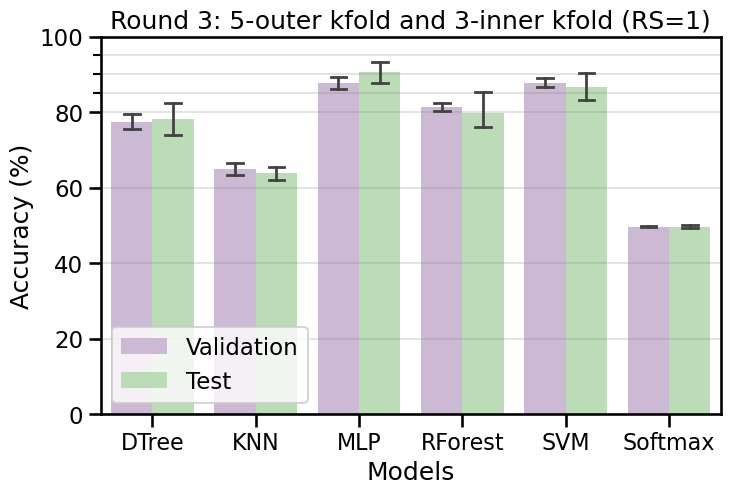

In [177]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
p = sns.barplot(x="model", y="rep", hue="set", data=df20,capsize=.15,palette="PRGn",errwidth=2, ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_yticks(np.arange(80, 100, 5),minor=True) # minor tick
ax.set(ylim=(0, 100)) # set y-axis scale
ax.set_title('Round 3: 5-outer kfold and 3-inner kfold (RS=1)')
ax.grid(which='both', axis='y',color='grey', linestyle='-', linewidth=.3) # major grid line
#ax.grid(which='major', axis='y',color='grey', linestyle='-', linewidth=.3) 
p.legend_.set_title(None)
plt.xticks(rotation =0,fontsize=16)

### Round4: change outer split to 4, inner split to 5 (random_state=1)

In [179]:
# Setting up multiple GridSearchCV objects, 1 for each algorithm
## Split outter loop = 4 (to mimic train-test spliting = 75:25)
## Split inner loop = 5 (to mimic cv=5 before discovering nestedCV) 

gridcvs = {}
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #original: n_splits=2

for est, pgrid, name in zip((clf1, clf2, clf3, clf4, clf5, clf6),
                            (param_grid1, param_grid2, param_grid3, param_grid4, param_grid5, param_grid6),
                            ('Softmax', 'KNN', 'DTree', 'RForest','SVM', 'MLP')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='accuracy',
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True) #finally, use best parameter to fit the total training set again
    gridcvs[name] = gcv

# Create dataframe to keep scores for ploting (by slicing index)    
d = {'col1': [1, 2,3,4]} # depends on no. of outer fold (here, k=4)
df11=pd.DataFrame(data=d)
df11 

,col1
0,1
1,2
2,3
3,4


In [180]:
import time

time_start = time.time()

df12=df11.iloc[:,0:0]
df15=df11.iloc[:,0:0]

for name, gs_est in sorted(gridcvs.items()):

    print(50 * '-', '\n')
    print('Algorithm:', name)
    print('    Inner loop:')
    
    outer_scores = []
    inner_scores = []
    outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=1) ## Split outter loop = 4 to mimic 75:25
    
    
    for train_idx, test_idx in outer_cv.split(x1, y1): #outer loop divided into train-test fold
        
        gridcvs[name].fit(x1.loc[train_idx], y1.loc[train_idx]) # edited from: fit(x1[train_idx], y1[train_idx])
                                                        # run inner loop hyperparam tuning, 
                                                        # where GridSearchCV for each model
        print('\n        Best ACC (avg. of inner test folds) %.2f%%' % (gridcvs[name].best_score_ * 100))
        print('        Best parameters:', gridcvs[name].best_params_)
        
        inner_scores.append(gridcvs[name].best_score_ * 100) # keep inner scores
        
        # Performance on test fold (test_idx)
        outer_scores.append(gridcvs[name].best_estimator_.score(x1.loc[test_idx], y1.loc[test_idx]))
                                                        # edited from: .score(x1[test_idx], y1[test_idx])
        print('        ACC (on outer test fold) %.2f%%' % (outer_scores[-1]*100))
    
    print('\n    Outer Loop:')
    print('        ACC %.2f%% +/- %.2f' % 
              (np.mean(outer_scores) * 100, np.std(outer_scores) * 100))
    
    # To make dataframe of outer_scores
    outer_scores2 = []
    for i in outer_scores:
        outer_scores2.append(i*100) # convert outer_scores to percentage
    df13 = pd.DataFrame(outer_scores2)
    df13.rename(columns={0: name},inplace=True)
    for i in df13.columns:
        df12[i]=df13[i]
    # To make dataframe of inner_scores
    df14 = pd.DataFrame(inner_scores)
    df14.rename(columns={0: name},inplace=True)
    for i in df14.columns:
        df15[i]=df14[i]
    
time_end = time.time()
print(f'Total Time: {(time_end - time_start)/60} - Minute')

-------------------------------------------------- 

Algorithm: DTree
    Inner loop:

        Best ACC (avg. of inner test folds) 78.54%
        Best parameters: {'criterion': 'entropy', 'max_depth': 6}
        ACC (on outer test fold) 77.50%

        Best ACC (avg. of inner test folds) 76.10%
        Best parameters: {'criterion': 'gini', 'max_depth': 3}
        ACC (on outer test fold) 83.75%

        Best ACC (avg. of inner test folds) 75.78%
        Best parameters: {'criterion': 'entropy', 'max_depth': 5}
        ACC (on outer test fold) 84.81%

        Best ACC (avg. of inner test folds) 83.72%
        Best parameters: {'criterion': 'entropy', 'max_depth': 3}
        ACC (on outer test fold) 70.89%

    Outer Loop:
        ACC 79.24% +/- 5.57
-------------------------------------------------- 

Algorithm: KNN
    Inner loop:

        Best ACC (avg. of inner test folds) 66.79%
        Best parameters: {'n_neighbors': 7, 'p': 1}
        ACC (on outer test fold) 62.50%

        Bes

#### Result

In [181]:
display(df15, df12)
# df15=inner_scores (validation_score)
# df12=outer_scores (test_scores)

,DTree,KNN,MLP,RForest,SVM,Softmax
0,78.537234,66.790780,91.604610,83.625887,88.244681,50.008865
1,76.099291,63.404255,84.051418,81.923759,87.429078,50.008865
2,75.780142,63.191489,89.982270,80.336879,88.297872,49.379433
3,83.723404,65.310284,89.556738,86.640071,89.982270,49.379433


,DTree,KNN,MLP,RForest,SVM,Softmax
0,77.500000,62.500000,91.250000,76.250000,88.750000,48.750000
1,83.750000,70.000000,81.250000,88.750000,90.000000,48.750000
2,84.810127,56.962025,93.670886,93.670886,91.139241,50.632911
3,70.886076,63.291139,87.341772,78.481013,82.278481,50.632911


In [182]:
#-----------Reformat inner_scores (validation set) dataframe-----------

df16=df15.transpose().reset_index(drop=False)
df16.rename(columns={'index': 'model'},inplace=True)

# df17 (a,b,c,d) equals to outer_cv (here=4)

df17a=df16.iloc[:,[0,1]]
df17a.rename(columns={0: 'rep'},inplace=True)

df17b=df16.iloc[:,[0,2]]
df17b.rename(columns={1: 'rep'},inplace=True)

df17c=df16.iloc[:,[0,3]]
df17c.rename(columns={2: 'rep'},inplace=True)

df17d=df16.iloc[:,[0,4]]
df17d.rename(columns={3: 'rep'},inplace=True)

df17 = pd.concat([df17a, df17b, df17c, df17d], ignore_index=True)

# insert column (validation or test sets)
df17.insert(0, "set", "Validation", True)


#-----------Reformat outer_scores (test set) dataframe-----------

df18=df12.transpose().reset_index(drop=False)
df18.rename(columns={'index': 'model'},inplace=True)

# df19 (a,b,c,d,...) equals to outer_cv (here=4)

df19a=df18.iloc[:,[0,1]]
df19a.rename(columns={0: 'rep'},inplace=True)

df19b=df18.iloc[:,[0,2]]
df19b.rename(columns={1: 'rep'},inplace=True)

df19c=df18.iloc[:,[0,3]]
df19c.rename(columns={2: 'rep'},inplace=True)

df19d=df18.iloc[:,[0,4]]
df19d.rename(columns={3: 'rep'},inplace=True)

df19 = pd.concat([df19a, df19b, df19c, df19d], ignore_index=True)

# insert column (validation or test sets)
df19.insert(0, "set", "Test", True)

# Finally, concat both 'Validation' and 'Test' dataframes
df20 = pd.concat([df17,df19], ignore_index=True)
with pd.option_context('display.max_rows',10): display(df20)

# 4 fold x 6 models = 24 x 2 (valid,test) = 48

/opt/anaconda3/envs/sklearnenv/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,set,model,rep
0,Validation,DTree,78.537234
1,Validation,KNN,66.790780
2,Validation,MLP,91.604610
3,Validation,RForest,83.625887
4,Validation,SVM,88.244681
...,...,...,...
43,Test,KNN,63.291139
44,Test,MLP,87.341772
45,Test,RForest,78.481013
46,Test,SVM,82.278481


#### Plot graph

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'DTree'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'MLP'),
  Text(3, 0, 'RForest'),
  Text(4, 0, 'SVM'),
  Text(5, 0, 'Softmax')])

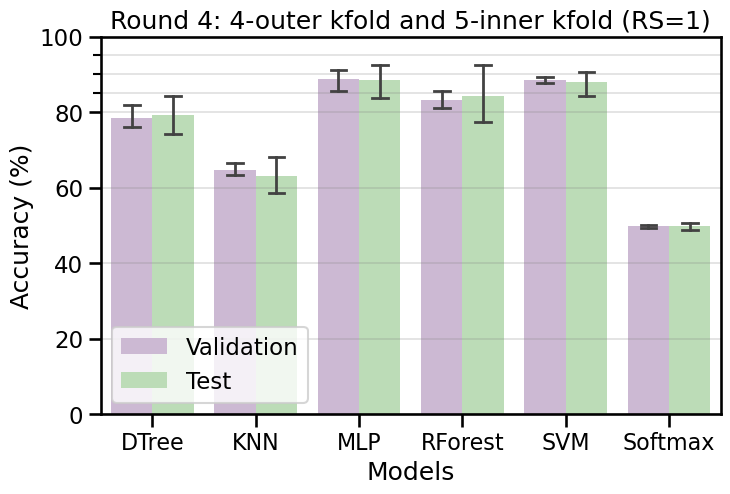

In [183]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
p = sns.barplot(x="model", y="rep", hue="set", data=df20,capsize=.15,palette="PRGn",errwidth=2, ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_yticks(np.arange(80, 100, 5),minor=True) # minor tick
ax.set(ylim=(0, 100)) # set y-axis scale
ax.set_title('Round 4: 4-outer kfold and 5-inner kfold (RS=1)')
ax.grid(which='both', axis='y',color='grey', linestyle='-', linewidth=.3) # major grid line
#ax.grid(which='major', axis='y',color='grey', linestyle='-', linewidth=.3) 
p.legend_.set_title(None)
plt.xticks(rotation =0,fontsize=16)

## STEP 2: Save the best model--> Round3 (MLP)

In [9]:
##---------Refer to parameter setting from Round 3-------------------
# Initializing Classifiers
clf1 = LogisticRegression(multi_class='multinomial',
                          solver='newton-cg',
                          random_state=1)
clf2 = KNeighborsClassifier(algorithm='ball_tree',
                            leaf_size=50)
clf3 = DecisionTreeClassifier(random_state=1)
clf4 = RandomForestClassifier(random_state=1)
clf5 = SVC(random_state=1)
clf6 = MLPClassifier(activation='relu',
                   solver='lbfgs', #change from lbfgs (default=adam, which is suitable for big data (>1000 samples)
                   max_iter=10000,   #increase interations from 10000
                   random_state=1)

# Setting up the parameter grids
param_grid1 = [{'penalty': ['l2'],
                'C': np.power(10., np.arange(-4, 4))}]

param_grid2 = [{'n_neighbors': list(range(1, 10)),
                'p': [1, 2]}]

param_grid3 = [{'max_depth': list(range(1, 10)) + [None],
                'criterion': ['gini', 'entropy']}]

param_grid4 = [{'n_estimators': range(10, 100, 5), #[10, 100, 500, 1000, 10000]
               'criterion': ['gini', 'entropy']}] #'max_depth': range(1, 80)

param_grid5 = [{'kernel': ['linear'], 'C': [0.1, 1, 5, 10, 50,100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 5, 10, 50,100], 'gamma': [0.0001,0.001,0.01,0.1,1,2,4,6,8,10]},
    {'kernel': ['poly'], 'C': [0.1, 1, 5, 10, 50,100], 'degree': [0.0001,0.001,0.01,0.1,1,2,4,6,8,10]}]


param_grid6 = [{'hidden_layer_sizes': range(3, 10)}]   #ทดสอบ 3 - 10 นิวรอน

In [17]:
# Setting up multiple GridSearchCV objects, 1 for each algorithm
## Split outter loop = 5 (to mimic train-test spliting = 75:25
## Split inner loop = 3 (to mimic cv=5 before discovering nestedCV) 

gridcvs = {}
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1) #original: n_splits=2

for est, pgrid, name in zip((clf6, clf5),
                            (param_grid6, param_grid5),
                            ('MLP', 'SVM')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='accuracy',
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True) #finally, use best parameter to fit the total training set again
    gridcvs[name] = gcv

# Create dataframe to keep scores for ploting (by slicing index)
#d = {'col1': [1, 2,3,4,5]} # depends on no. of outer fold (here, k=5)
#df11=pd.DataFrame(data=d)
#df11 

In [22]:
import time

time_start = time.time()

#df12=df11.iloc[:,0:0]
#df15=df11.iloc[:,0:0]

i = 0

for name, gs_est in sorted(gridcvs.items()):

    print(50 * '-', '\n')
    print('Algorithm:', name)
    print('    Inner loop:')
    
    outer_scores = []
    inner_scores = []
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) ## Split outter loop = 5 to mimic 80:20
    
    for train_idx, test_idx in outer_cv.split(x1, y1): #outer loop divided into train-test fold
        
        gridcvs[name].fit(x1.loc[train_idx], y1.loc[train_idx]) # edited from: fit(x1[train_idx], y1[train_idx])
                                                        # run inner loop hyperparam tuning, 
                                                        # where GridSearchCV for each model
        print('\n        Best ACC (avg. of inner test folds) %.2f%%' % (gridcvs[name].best_score_ * 100))
        print('        Best parameters:', gridcvs[name].best_params_)
        
        inner_scores.append(gridcvs[name].best_score_ * 100) # keep inner scores
        
        # Performance on test fold (test_idx)
        outer_scores.append(gridcvs[name].best_estimator_.score(x1.loc[test_idx], y1.loc[test_idx]))
                                                        # edited from: .score(x1[test_idx], y1[test_idx])
        print('        ACC (on outer test fold) %.2f%%' % (outer_scores[-1]*100))
        
        i += 1
        if i ==3:
            break # to break loop when running until outer fold=3
    
    print('\n    Outer Loop:')
    print('        ACC %.2f%% +/- %.2f' % 
                (np.mean(outer_scores) * 100, np.std(outer_scores) * 100))
    
    break # to pause until MLP
    
time_end = time.time()
print(f'Total Time: {(time_end - time_start)/60} - Minute')

-------------------------------------------------- 

Algorithm: MLP
    Inner loop:

        Best ACC (avg. of inner test folds) 89.39%
        Best parameters: {'hidden_layer_sizes': 7}
        ACC (on outer test fold) 92.19%

        Best ACC (avg. of inner test folds) 84.65%
        Best parameters: {'hidden_layer_sizes': 6}
        ACC (on outer test fold) 90.62%

        Best ACC (avg. of inner test folds) 87.03%
        Best parameters: {'hidden_layer_sizes': 5}
        ACC (on outer test fold) 95.31%

    Outer Loop:
        ACC 92.71% +/- 1.95
Total Time: 0.47482159932454426 - Minute


In [27]:
print(inner_scores)
print(outer_scores)

[89.38842203548086, 84.64985994397759, 87.03081232492997]
[0.921875, 0.90625, 0.953125]


In [26]:
# The last model variable
gridcvs[name].best_estimator_.score(x1.loc[test_idx], y1.loc[test_idx])

0.953125

In [34]:
gcv_model_select = gridcvs[name].best_estimator_
print(gcv_model_select) # Final model
print(gcv_model_select.score(x1.loc[test_idx], y1.loc[test_idx]))

MLPClassifier(hidden_layer_sizes=5, max_iter=10000, random_state=1,
              solver='lbfgs')
0.953125


In [47]:
# Model evaluation
X1_train = x1.loc[train_idx]
X1_test = x1.loc[test_idx]
y1_train = y1.loc[train_idx]
y1_test = y1.loc[test_idx]

y1_pred_train = gcv_model_select.predict(X1_train)
y1_pred_test = gcv_model_select.predict(X1_test)

train_acc = accuracy_score(y_true=y1_train, y_pred=y1_pred_train)
test_acc = accuracy_score(y_true=y1_test, y_pred=y1_pred_test)

print('\n')
print('Training Accuracy: %.2f%%' % (100 * train_acc))
print('Test Accuracy: %.2f%%' % (100 * test_acc))



Training Accuracy: 100.00%
Test Accuracy: 95.31%


In [37]:
# Model evaluation
#------Model Evaluation and Confusion matrix------

## https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [43]:
X1_test = x1.loc[test_idx]
y1_test = y1.loc[test_idx]
y1_pred = gcv_model_select.predict(X1_test)

print(confusion_matrix(y1_test,y1_pred))

class_names = ['clus1', 'clus2','clus3']
print('MLP for X1,y1')
print(classification_report(y1_test,y1_pred, target_names=class_names))

# Note: testing set =20%
# clus_1 = 0.2*90 = 18 samples (row sum = 16+1+1)
# clus_2 = 0.2*158 = 31.6 samples (row sum = 2+30+0)
# clus_3 = 0.2*70 = 14 samples (row sum = 1+2+11)

[[17  0  1]
 [ 0 30  2]
 [ 0  0 14]]
MLP for X1,y1
              precision    recall  f1-score   support

       clus1       1.00      0.94      0.97        18
       clus2       1.00      0.94      0.97        32
       clus3       0.82      1.00      0.90        14

    accuracy                           0.95        64
   macro avg       0.94      0.96      0.95        64
weighted avg       0.96      0.95      0.95        64



Confusion matrix_107 Features(ridge)_MLP
[[17  0  1]
 [ 0 30  2]
 [ 0  0 14]]
Normalized confusion matrix
[[0.94 0.   0.06]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


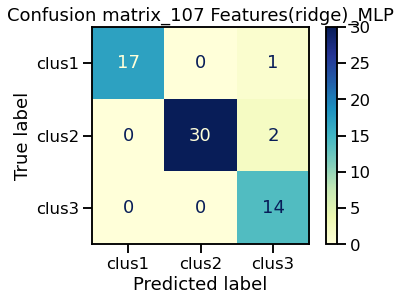

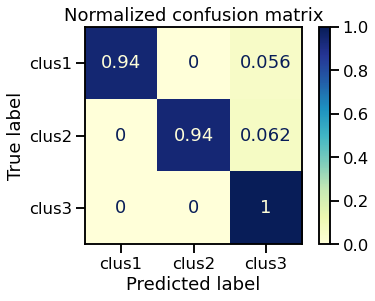

In [42]:
# Plot non-normalized confusion matrix for SVC (best score)
# 

X1_test = x1.loc[test_idx]
y1_test = y1.loc[test_idx]

sns.set_context('talk')
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix_107 Features(ridge)_MLP", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gcv_model_select, X1_test, y1_test,
                                display_labels=class_names,
                                 cmap=plt.cm.YlGnBu,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [41]:
# Save model using Pickle
import pickle

pickle.dump(gcv_model_select, open('Model1_Fea107Ridge_MLP_nestedCV_11Aug.plk', 'wb')) # MLP of X1,y1 --> Save model

loaded_model1 = pickle.load(open('Model1_Fea107Ridge_MLP_nestedCV_11Aug.plk', 'rb')) # --> Load model from disk 

X1_test = x1.loc[test_idx]
y1_test = y1.loc[test_idx]

result1 = loaded_model1.score(X1_test, y1_test)
result1

0.953125